# Gambler's Problem

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips.
- If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake.
- The game ends when the gambler wins by reaching his goal of 100 dollars, or loses by running out of money.
- On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars.
- This problem can be formulated as an undiscounted, episodic, finite MDP.
    -  The  state is the gambler’s capital, $s \in S = \{ 1,2,...,99 \}$ and the actions are stakes, $a \in \{ 0,1,...,min(s,100-s) \}$.
    -  The reward is 0 on all transitions except those on which the gambler reaches his goal, when it is +1.
    -  The state-value function then gives the probability of winning from each state.
    -  A policy is a mapping from levels of capital to stakes.
    -  The optimal policy maximizes the probability of reaching the goal.

- Let $p_h$ denote the probability of the coin coming up heads.
    -  If $p_h$ is known, then the entire problem is known, and it can be solved, for instance, by value iteration.
- Figure 4.3 shows the change in the value function over successive sweeps of value iteration, and the final policy found, for the case of $p_h = 0.4$.
    -  This policy is optimal, but not unique.
    -  In fact, there is a whole family of optimal policies, all corresponding to ties for the argmax action selection with respect to the optimal value function.

In [1]:
from IPython.display import Image

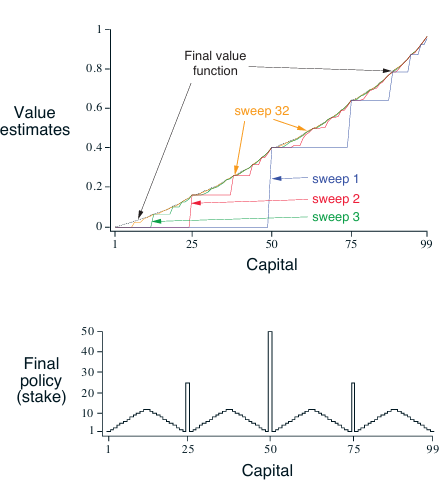

In [2]:
Image(filename="../book_images/Figure_4_3.PNG")

Figure 4.3: The solution to the gambler’s problem for $p_h = 0.4$.
- The upper graph shows the value function found by successive sweeps of value iteration.
- The lower graph shows the final policy.

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.use('Agg')

In [4]:
# Goal
goal = 100

# All states: s ∈ 𝒮^+ = {0, S, 100} = {0, 1, 2, ..., 99, 100}
states = np.arange(goal + 1)

# Probability of the coin coming up heads (denoted as p_h)
head_probability = 0.4

In [5]:
# Initialize state-value function (denoted as V(s), ∀s ∈ 𝒮^+), arbitrarily except that V(terminal state) = 0
state_value = np.zeros(goal + 1)
state_value[goal] = 1.0

# History of sweeps
sweeps_history = []

In [6]:
# Value Iteration
while True:
    # Save the old state-value (denoted as v)
    old_state_value = state_value.copy()
    
    # Append the old state-value to the history of sweeps
    sweeps_history.append(old_state_value)
    
    # Compute the optimal policy (denoted as 𝜋 ≈ 𝜋_∗)
    policy = np.zeros(goal + 1)
    
    # For every state representing a capital
    for state in states[1:goal]:
        # get possible actions representing stakes for current state
        actions=np.arange(min(state,goal-state)+1)
        
        # prepare an empty list for action returns
        action_returns=[]
        
        # for every action
        for action in actions:
            # calculate return and append it to the list of action returns
            action_returns.append(head_probability*state_value[state+action] + (1.0-head_probability)*state_value[state-action])
        
        # set the maximum action return as a value of the current state
        state_value[state] = np.max(action_returns)
        
        # set the action with maximum action return as a policy in the current state (round to resemble the figure in the book)
        policy[state] = actions[np.argmax(np.round(action_returns[1:],5))+1]
    
    # Value function change in a sweep (denoted as ∆)
    value_function_change = np.max(np.abs(state_value-old_state_value))
    
    # Algorithm parameter: a small threshold determining accuracy of estimation (denoted as 𝜃 > 0)
    estimation_accuracy = 1e-9
    
    # Like policy evaluation, value iteration formally requires an infinite number of iterations to converge exactly to 𝑣_∗.
    # In practice, we stop once the value function changes by only a small amount in a sweep.
    if value_function_change < estimation_accuracy:
        sweeps_history.append(state_value)
        break

In [7]:
# Plotting
plt.figure(figsize=(10, 20))

<Figure size 1000x2000 with 0 Axes>

In [8]:
plt.subplot(2, 1, 1)
for sweep, state_value in enumerate(sweeps_history):
    plt.plot(state_value, label=f'sweep {sweep}')
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.legend(loc='best')

In [9]:
plt.subplot(2, 1, 2)
plt.scatter(states, policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')

Text(0, 0.5, 'Final policy (stake)')

In [10]:
plt.savefig('../generated_images/figure_4_3.png')
plt.close()